In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
def fbm(n,T,H,dim):
    dt = T/n
    fbm = np.zeros((dim,n))
    M = np.zeros((dim,n,n))

    rv = norm.rvs(size=(dim,n) , scale=np.sqrt(dt))
    
    for d in range(dim):
        for i in range(n):
            for j in range(n):
                M[d,i,j] = 0.5*(np.power(np.abs(i*dt),2*H)+np.power(np.abs(j*dt),2*H)+np.power(np.abs(i*dt-j*dt),2*H))
                
    w,v = np.linalg.eig(M)
    w = np.abs(w)
    L = np.zeros((dim,n,n))
    for d in range(dim):
        for i in range(n):
            L[d,i,i] = np.sqrt(w[d,i])
    
    for d in range(dim):
        
        fbm[d,:] = (v[d,:,:] * L[d,:,:] * np.linalg.inv(v[d,:,:])).dot(rv[d,:])

    return fbm

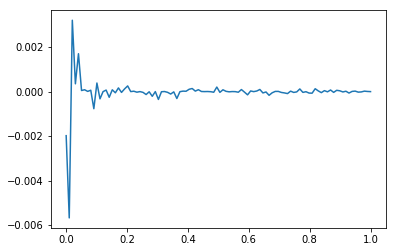

In [8]:
n = 100
T = 1
plt.plot(np.linspace(0,T,n), fbm(n,T,0.5,1)[0,:])


In [9]:
from fbm import FBM


f = FBM(n=1024, hurst=0.75, length=1, method='daviesharte')
# or
f = FBM(1024, 0.75)

# Generate a fBm realization
fbm_sample = f.fbm()

# Generate a fGn realization
fgn_sample = f.fgn()

# Get the times associated with the fBm
t_values = f.times()

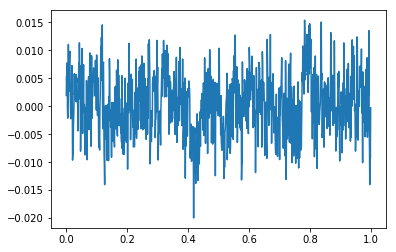

In [11]:
plt.plot(np.linspace(0,1,1024),  f.fgn())

In [13]:
from . import data_EM

ImportError: attempted relative import with no known parent package